In [1]:
import numpy as np
import pandas as pd
from os import path
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/listings_1.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20210710185946,2021-07-11,Hyde Park - Walk to University of Chicago,"If you have been fully vaccinated, you are inv...",The apartment is less than one block from beau...,https://a0.muscache.com/pictures/acf6b3c0-47f2...,2613,https://www.airbnb.com/users/show/2613,...,4.98,4.95,4.94,R17000015609,f,1,0,1,0,2.45
1,7126,https://www.airbnb.com/rooms/7126,20210710185946,2021-07-11,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,https://www.airbnb.com/users/show/17928,...,4.85,4.87,4.72,R18000034991,f,1,1,0,0,3.32
2,10945,https://www.airbnb.com/rooms/10945,20210710185946,2021-07-11,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,https://www.airbnb.com/users/show/33004,...,4.64,4.96,4.54,2120297,t,10,10,0,0,0.32
3,12068,https://www.airbnb.com/rooms/12068,20210710185946,2021-07-10,Chicago GOLD COAST 1 Bedroom Condo,Available as extended stay rental located in C...,The condo is on Lasalle just off of Division; ...,https://a0.muscache.com/pictures/110562313/69f...,40731,https://www.airbnb.com/users/show/40731,...,4.73,4.73,4.73,City registration pending,f,1,1,0,0,0.14
4,12140,https://www.airbnb.com/rooms/12140,20210710185946,2021-07-10,Lincoln Park Guest House,Bed and Breakfast license issued by the City o...,The Guest House is in the heart of Chicago's m...,https://a0.muscache.com/pictures/55126/6a4f01b...,46734,https://www.airbnb.com/users/show/46734,...,5.00,5.00,5.00,R20000055258,f,1,0,1,0,0.10


In [3]:
list(df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [4]:
print("There are {} different neighborhoods listed in this dataset, such as: {}.".format(len(df.host_neighbourhood.unique()), ", ".join(df.host_neighbourhood.unique()[0:5])))

There are 168 different neighborhoods listed in this dataset, such as: Hyde Park, Ukrainian Village, Old Town, Lincoln Park, West Town/Noble Square.


In [5]:
neighborhood = df.groupby("host_neighbourhood")
neighborhood.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20210710185946,2021-07-11,Hyde Park - Walk to University of Chicago,"If you have been fully vaccinated, you are inv...",The apartment is less than one block from beau...,https://a0.muscache.com/pictures/acf6b3c0-47f2...,2613,https://www.airbnb.com/users/show/2613,...,4.98,4.95,4.94,R17000015609,f,1,0,1,0,2.45
1,7126,https://www.airbnb.com/rooms/7126,20210710185946,2021-07-11,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhoo...,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,https://www.airbnb.com/users/show/17928,...,4.85,4.87,4.72,R18000034991,f,1,1,0,0,3.32
2,10945,https://www.airbnb.com/rooms/10945,20210710185946,2021-07-11,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,https://www.airbnb.com/users/show/33004,...,4.64,4.96,4.54,2120297,t,10,10,0,0,0.32
3,12068,https://www.airbnb.com/rooms/12068,20210710185946,2021-07-10,Chicago GOLD COAST 1 Bedroom Condo,Available as extended stay rental located in C...,The condo is on Lasalle just off of Division; ...,https://a0.muscache.com/pictures/110562313/69f...,40731,https://www.airbnb.com/users/show/40731,...,4.73,4.73,4.73,City registration pending,f,1,1,0,0,0.14
4,12140,https://www.airbnb.com/rooms/12140,20210710185946,2021-07-10,Lincoln Park Guest House,Bed and Breakfast license issued by the City o...,The Guest House is in the heart of Chicago's m...,https://a0.muscache.com/pictures/55126/6a4f01b...,46734,https://www.airbnb.com/users/show/46734,...,5.00,5.00,5.00,R20000055258,f,1,0,1,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6177,50288318,https://www.airbnb.com/rooms/50288318,20210710185946,2021-07-11,Cozy clean apt and the urban metropolitan area,Enjoy the elegance of this beautiful apartment...,"Rainbow bow beach , Downtown Chicago, Navy pie...",https://a0.muscache.com/pictures/2e24564e-9b50...,406057923,https://www.airbnb.com/users/show/406057923,...,NaN,NaN,NaN,City registration pending,t,1,1,0,0,NaN
6218,50391061,https://www.airbnb.com/rooms/50391061,20210710185946,2021-07-11,VIBES Chicago Private Room,Beautiful 1200sq.ft home with a huge yard on t...,NaN,https://a0.muscache.com/pictures/067c9d49-c1cc...,26404242,https://www.airbnb.com/users/show/26404242,...,NaN,NaN,NaN,R20000057871,f,2,0,2,0,NaN
6222,50402647,https://www.airbnb.com/rooms/50402647,20210710185946,2021-07-11,Discover North Side Chicago from Modern Apartment,Stretch out on a Sofa bed of this modern studi...,NaN,https://a0.muscache.com/pictures/c18b7c24-f4ff...,228485415,https://www.airbnb.com/users/show/228485415,...,5.00,5.00,5.00,City registration pending,t,4,4,0,0,2.00
6277,50594581,https://www.airbnb.com/rooms/50594581,20210710185946,2021-07-11,"Lovely two bedroom condo, relaxing, peaceful w...",Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/67b9ac8f-0e0f...,402792711,https://www.airbnb.com/users/show/402792711,...,5.00,5.00,5.00,City registration pending,f,2,2,0,0,1.00


In [6]:
neighborhood["name"].count().sort_values(ascending=False).head(10)

host_neighbourhood
Logan Square    301
Lakeview        298
River North     272
Cambridge       260
Loop            200
Lincoln Park    176
Irving Park     176
Wicker Park     144
Bucktown        142
Uptown          139
Name: name, dtype: int64

In [7]:
neighbs = df["host_neighbourhood"].unique().astype(str)
neighbs.sort()
neighbs2 = neighbs.tolist()

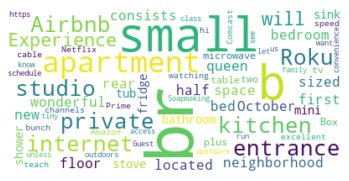

In [8]:
# Start with one review:
text = df.description[1]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# df['description'].dropna(inplace=True)

In [10]:
# tokens = df['description'].apply(word_tokenize)

In [11]:
# tokens.decode("utf-8")

In [12]:
# text = word_tokenize(name for name in df.name)
text2 = " ".join(desc for desc in df.name)

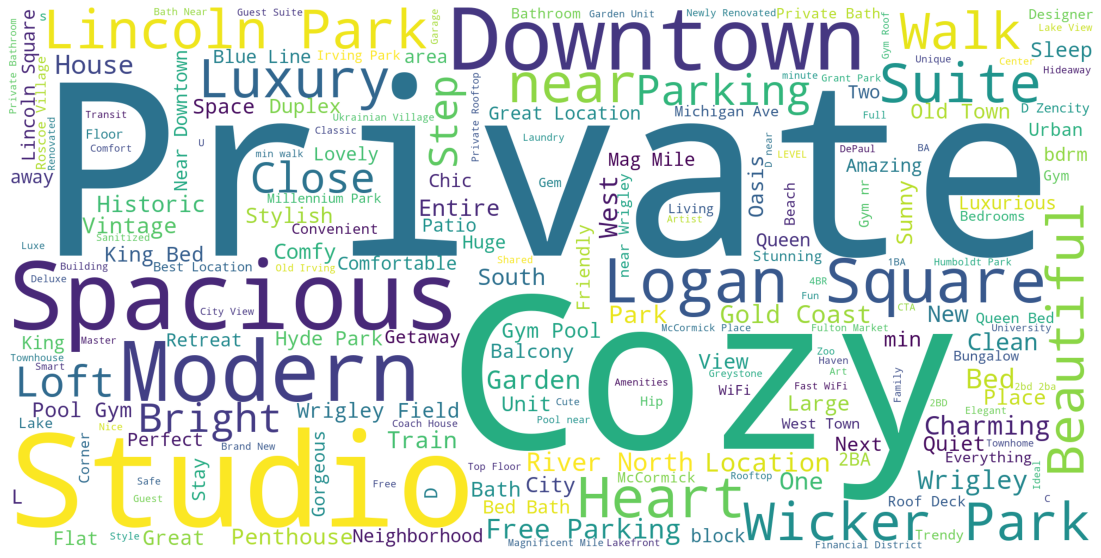

In [13]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(neighbs2)
stopwords.update(["1BR", "2BR", "3BR", "Apartment", "Apt", "Bedroom", "Blueground", "Chicago", "Condo", "Home", "Room", "W", "br", "b"])

# Generate a word cloud image
wordcloud = WordCloud(width=2000, height=1000, stopwords=stopwords, background_color="white").generate(text2)

# Display the generated image:
fig = plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# fig.savefig('word_cloud.png')